## 이산형 데이터를 어떻게 처리할까?

### One-Hot Encoding

In [1]:
import pandas as pd
import numpy as np

In [6]:
edges = pd.DataFrame({'source' : [0, 1, 2],
                    'target' : [2, 2, 3],
                    'weigth' : [3, 4, 5],
                    'color' : ['red', 'blue', 'blue']})
edges

,source,target,weigth,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [10]:
edges.dtypes

source     int64
target     int64
weigth     int64
color     object
dtype: object

In [3]:
edges['source']

0    0
1    1
2    2
Name: source, dtype: int64

In [4]:
edges['color']

0     red
1    blue
2    blue
Name: color, dtype: object

In [8]:
pd.get_dummies(edges['color'])

,blue,red
0,0,1
1,1,0
2,1,0


In [9]:
# color에 red, blue가 있는데 one-hot encoding
pd.get_dummies(edges[['color']])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


#### 일반적으로 많이 사용하는 방법

- pd.get_dummies(edges['color']) 으로 색깔만 따로 뽑은 뒤에, 원래 있던 데이터에 concat 시켜주기
- 장점 - 데이터의 손실이 없음

In [18]:
pd.concat([edges, pd.get_dummies(edges['color'])], axis=1)

,source,target,weigth,color,blue,red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


#### dataframe 형태로 뽑아서 merge 시켜주기

In [19]:
pd.get_dummies(edges[['color']])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [20]:
pd.concat([edges, pd.get_dummies(edges[['color']])], axis=1)

,source,target,weigth,color,color_blue,color_red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


In [23]:
pd.merge(edges, pd.get_dummies(edges[['color']]),
        left_index=True, right_index=True)

,source,target,weigth,color,color_blue,color_red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


## 서수형 데이터 (순서가 있는 데이터)의 one-hot-encoding

- 보통 one hot encoding을 할 수 있도록 형태를 바꿔준다
- 아래의 예시에서는 weight 3, 4, 5를 각각 새로운 column인 weight_sign의 M, L, XL 으로 mapping 시켜줬음

In [38]:
weight_dict = {3: 'M', 4: 'L', 5: 'XL'}
edges['weight_sign'] = edges['weigth'].map(weight_dict)
edges

,source,target,weigth,color,weigth_sign,weight_sign
0,0,2,3,red,M,M
1,1,2,4,blue,L,L
2,2,3,5,blue,XL,XL


In [44]:
edges = edges.drop(columns='weigth_sign', axis=1)

In [45]:
edges

,source,target,weigth,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


- 이후에 get_dummies

In [46]:
weight_sign = pd.get_dummies(edges[['weight_sign']])
weight_sign

,weight_sign_L,weight_sign_M,weight_sign_XL
0,0,1,0
1,1,0,0
2,0,0,1


In [50]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weigth,color,weight_sign,weight_sign_L,weight_sign_M,weight_sign_XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


## Data Binning

- Numeric Data이지만 Categorical 하게 나누는 것이 더 좋은 경우가 있음

1. Equal width
   - 데이터의 간격를 기준으로 해서 자름

2. Equal frequency
   - 데이터의 출현 개수를 기준으로 해서 자름

In [52]:
# Example from - https://chrisalbon.com/python/pandas_binning_data.html

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


- 위의 DataFrame 에서 postTestScore column을 나누는 경우에, 점수로 그대로 사용해도 되고, Level을 나눌 수도 있음

<Axes: >

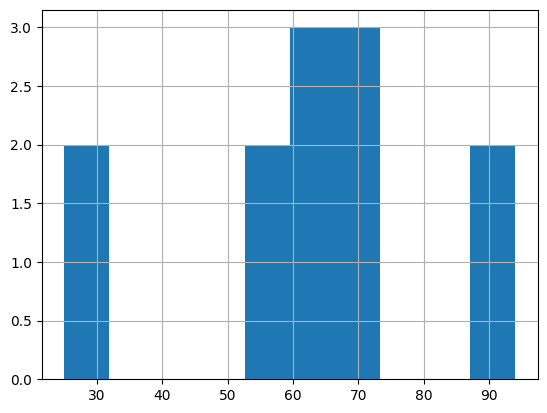

In [54]:
df['postTestScore'].hist()

- 위의 히스토그램을 바탕으로 기준점을 정할 수 있음

In [57]:
bins = [0, 50, 80, 100] # Define bins
group_names = ['Low', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins= bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (3, object): ['Low' < 'Good' < 'Great']

In [59]:
df['categories'] = categories
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


In [65]:
categories_dummy = pd.get_dummies(df[['categories']])
categories_dummy

,categories_Low,categories_Good,categories_Great
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,1,0


In [66]:
pd.concat([df, categories_dummy], axis=1)

,regiment,company,name,preTestScore,postTestScore,categories,categories_Low,categories_Good,categories_Great
0,Nighthawks,1st,Miller,4,25,Low,1,0,0
1,Nighthawks,1st,Jacobson,24,94,Great,0,0,1
2,Nighthawks,2nd,Ali,31,57,Good,0,1,0
3,Nighthawks,2nd,Milner,2,62,Good,0,1,0
4,Dragoons,1st,Cooze,3,70,Good,0,1,0
5,Dragoons,1st,Jacon,4,25,Low,1,0,0
6,Dragoons,2nd,Ryaner,24,94,Great,0,0,1
7,Dragoons,2nd,Sone,31,57,Good,0,1,0
8,Scouts,1st,Sloan,2,62,Good,0,1,0
9,Scouts,1st,Piger,3,70,Good,0,1,0


## Label encoding by sklearn

- Scikit-learn의 preprocessing 패키지도 label, one-hot을 지원함

#### fit과 transform의 과정이 나눠진 이유

- 새로운 데이터를 입력할 때 기존 labelling 규칙을 그대로 적용할 필요가 있음. 이때 Fit을 통해서 규칙을 생성하고, Transform을 통해서 규칙을 적용함

In [71]:
raw_example = df.values
raw_example[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [72]:
data = raw_example.copy()
data

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good'],
       ['Nighthawks', '2nd', 'Milner', 2, 62, 'Good'],
       ['Dragoons', '1st', 'Cooze', 3, 70, 'Good'],
       ['Dragoons', '1st', 'Jacon', 4, 25, 'Low'],
       ['Dragoons', '2nd', 'Ryaner', 24, 94, 'Great'],
       ['Dragoons', '2nd', 'Sone', 31, 57, 'Good'],
       ['Scouts', '1st', 'Sloan', 2, 62, 'Good'],
       ['Scouts', '1st', 'Piger', 3, 70, 'Good'],
       ['Scouts', '2nd', 'Riani', 2, 62, 'Good'],
       ['Scouts', '2nd', 'Ali', 3, 70, 'Good']], dtype=object)

## sklearn - LabelEncoder

In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [82]:
data[:,0]

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons',
       'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts',
       'Scouts'], dtype=object)

In [83]:
le.fit(data[:,0])

LabelEncoder()

In [86]:
le.classes_

array(['Dragoons', 'Nighthawks', 'Scouts'], dtype=object)

#### transform 시켜주기

- Dragoons : 0
- Nighthawks : 1
- Scouts : 2

In [85]:
le.transform(raw_example[:,0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [87]:
data[:,0] = le.transform(raw_example[:,0])
data

array([[1, '1st', 'Miller', 4, 25, 'Low'],
       [1, '1st', 'Jacobson', 24, 94, 'Great'],
       [1, '2nd', 'Ali', 31, 57, 'Good'],
       [1, '2nd', 'Milner', 2, 62, 'Good'],
       [0, '1st', 'Cooze', 3, 70, 'Good'],
       [0, '1st', 'Jacon', 4, 25, 'Low'],
       [0, '2nd', 'Ryaner', 24, 94, 'Great'],
       [0, '2nd', 'Sone', 31, 57, 'Good'],
       [2, '1st', 'Sloan', 2, 62, 'Good'],
       [2, '1st', 'Piger', 3, 70, 'Good'],
       [2, '2nd', 'Riani', 2, 62, 'Good'],
       [2, '2nd', 'Ali', 3, 70, 'Good']], dtype=object)

#### 여러개의 numeric 값들을 categorical data로 바꿔주기

In [88]:
label_column = [0, 1, 2, 5]
label_enconder_list = []
for column_index in label_column:
    le = preprocessing.LabelEncoder()
    le.fit(raw_example[:, column_index])
    data[:,column_index] = le.transform(raw_example[:,column_index])
    label_enconder_list.append(le)
    del le

data[:3]

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0]], dtype=object)

#### 어떤 값들로 바꿔줬는지에 대한 정보 확인 가능

In [91]:
label_enconder_list[0].classes_

array(['Dragoons', 'Nighthawks', 'Scouts'], dtype=object)

In [92]:
label_enconder_list[1].classes_

array(['1st', '2nd'], dtype=object)

In [93]:
label_enconder_list[2].classes_

array(['Ali', 'Cooze', 'Jacobson', 'Jacon', 'Miller', 'Milner', 'Piger',
       'Riani', 'Ryaner', 'Sloan', 'Sone'], dtype=object)

## sklearn - OneHotEncoder

- 데이터가 많은 경우 사용

In [97]:
one_hot_enc = preprocessing.OneHotEncoder()

In [98]:
data[:, 0].reshape(-1, 1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [99]:
one_hot_enc.fit(data[:, 0].reshape(-1, 1))

OneHotEncoder()

In [102]:
onehotlabels = one_hot_enc.transform(data[:, 0].reshape(-1, 1)).toarray()
onehotlabels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## Titanic One-hot encoding

In [103]:
import os
DATA_DIR = './titanic'
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort=False)
df = df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [104]:
number_of_train_dataset = df['Survived'].notnull().sum()  # train data의 개수
number_of_test_dataset = df['Survived'].isnull().sum()  # test data의 개수
y_true = df.pop('Survived')[:number_of_train_dataset]  # train data까지 슬라이싱

In [105]:
object_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', "Ticket", 'Cabin', 'Embarked']
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [106]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 반복문을 통해서 object type은 object type, numeric type은 numeric type으로

In [107]:
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)

df['Parch'] = df['Parch'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Pclass       1309 non-null   object 
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 112.6+ KB


In [110]:
def merge_and_get(ldf, rdf, on, how='inner', index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

##### Embarked에 2개의 결측치가 있는데, 그것을 최빈값으로 채워주기

In [114]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [115]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

### One-Hot-Encoding

In [113]:
df.loc[61, 'Embarked'] = 'S'
df.loc[829, 'Embarked'] = 'S'

In [122]:
sex_dummies = pd.get_dummies(df[['Sex']])
pclass_dummies = pd.get_dummies(df[['Pclass']])
embarked_dummies = pd.get_dummies(df[['Embarked']])

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_28076/1899553838.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pclass_dummies = pd.get_dummies(df[['Pclass']])


In [128]:
one_hot_df = merge_and_get(df, sex_dummies, on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, pclass_dummies, on=None, index=True)
one_hot_df = merge_and_get(one_hot_df, embarked_dummies, on=None, index=True)

In [130]:
one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1,0,0,1,0,0,1


### 결과값 확인하기

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

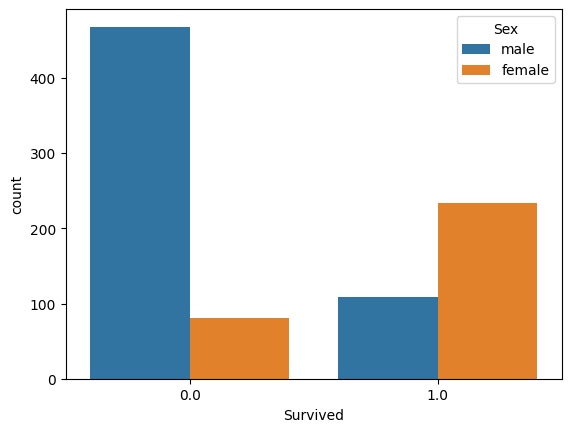

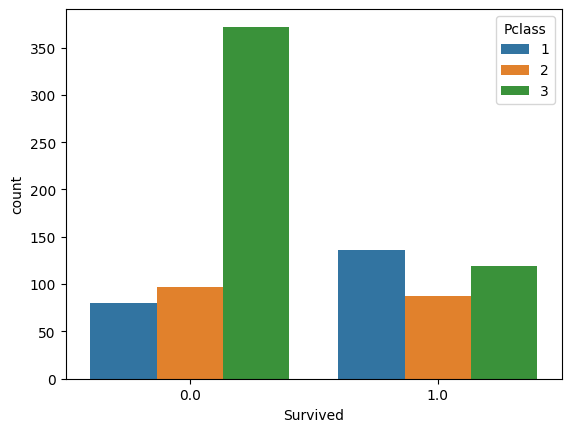

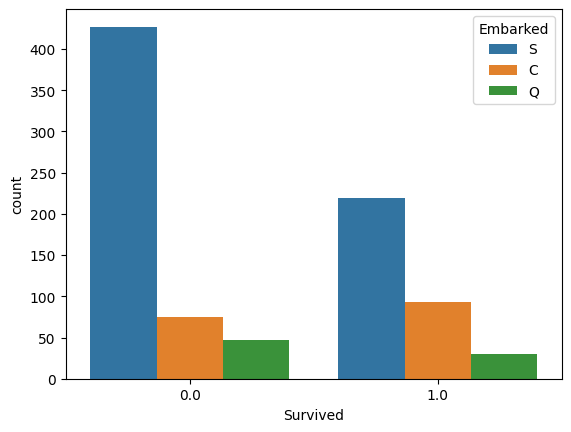

In [132]:
temp_columns = ['Sex', 'Pclass', 'Embarked']
for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x = 'Survived', hue=col_name, data=temp_df)
    plt.show()

- 성별과 생존여부에는 연관성이 있다.
- pclass와 생존여부에는 차이가 있다. 낮은 class에는 생존율이 낮다.
- S에서 탑승한 사람의 생존율이 훨씬 낮았다.

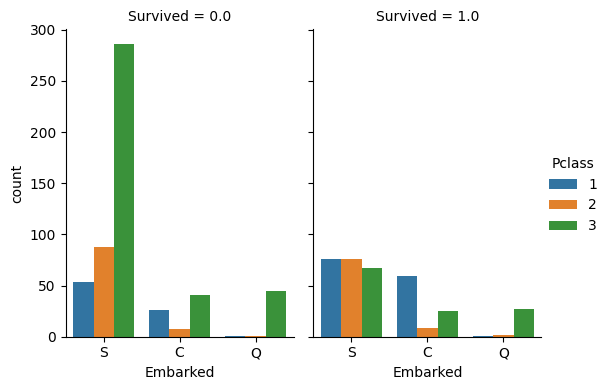

In [135]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x = 'Embarked', hue = 'Pclass', col='Survived', data=temp_df, kind='count', height=4, aspect=0.7)

- 생존했을 경우에는 모두 비슷하지만, 사망률의 경우에는 S가 훨씬 많은 것을 확인할 수 있다.
  - 그당시 S에 살던 사람들은 C나 Q에 살던 사람들보다 경제적 여유가 없었는가? 등의 추측을 할 수 있음

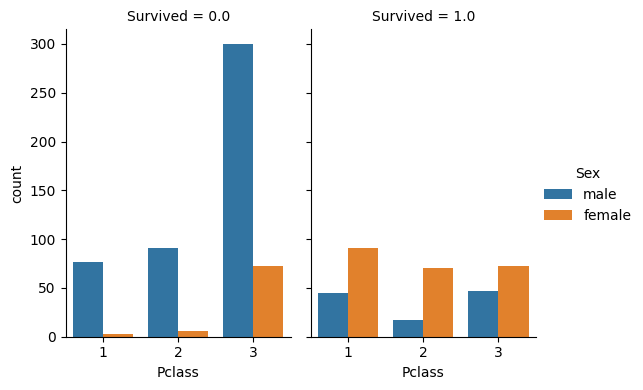

In [136]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x = 'Pclass', hue = 'Sex', col='Survived', data=temp_df, kind='count', height=4, aspect=0.7)

- 3등석에 있던 남성이 가장 많이 사망했음을 알 수 있음
- 1등석, 2등석, 3등석을 가리지 않고 남성보다 여성의 생존율이 월등히 높음

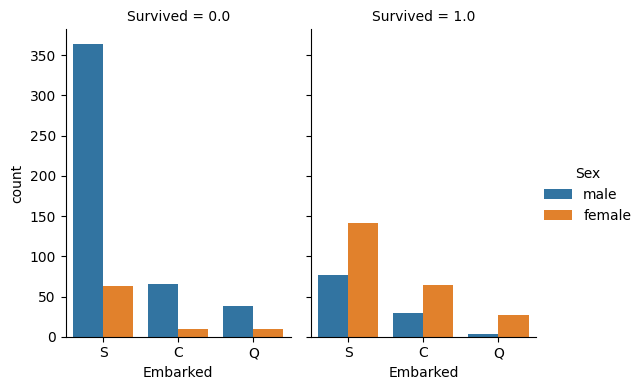

In [137]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x = 'Embarked', hue = 'Sex', col='Survived', data=temp_df, kind='count', height=4, aspect=0.7)

### correlaion

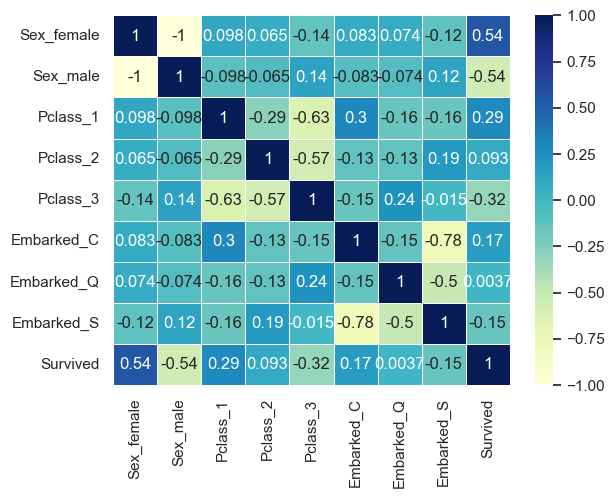

In [141]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist() if col_name.split('_')[0] in temp_columns and "_" in col_name]


# temp_columns
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=0.5, cmap='YlGnBu')